#### Avacado Project
#### Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 
Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price.

In [235]:
#Importing Necessory Libraries:

import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Model Creation :
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score

#Metrics:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [117]:
# Reading the CSV file:
df = pd.read_csv(r"C:\Users\HP\Downloads\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- By reading the dataset we got to know that there are 14 columns in this dataset of which 11 columns are independent variables('Total Volume', '4046', '4225','4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type','year','region') and the dependent variable is 'AveragePrice'. As we need to predict the Average price(Continuous value) of Hass avocados , it is a regression problem.
- Out of 14 columns 3 columns are having Nominal value(Date,type,region), 8 columns ( Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags ) are having float type of value(Continuous value) along with the label data(AveragePrice). And 1 column is having ordinal value ('Year').
Lastly, there is a column called 'Unnamed: 0'. We are going to drop that as it's not containing any important value.

In [118]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

- As we already have seen, that 3 columns are having Nominal values(object data type) 'Date','type' and 'region'.

- 8 columns are having continuous values (float data type)'AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags'.

- 2 columns are having discrete values(integer data type) 'Unnamed: 0' and 'year'

In [119]:
df.shape

(18249, 14)

- The dataset contains 18249 rows and 14 columns, out of which 12 columns are features and 1 is the label column. And lastly 1 is the Unnamed:0 column which we will drop.

In [120]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

- As we can see, there are 14 columns: 'Date', 'AveragePrice', 'Total Volume', '4046', '4225','4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type','year', 'region' and Unnamed :0. Where 'Date','Total Volume', '4046', '4225','4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type','year', 'region' are the feature columns and 'AveragePrice' is the label column.

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- As we can see each column is having 18249 count of value that means there is no null value present in the dataset.
- And 3 columns are having Nominal values(object data type) 'Date','type' and 'region'. 8 columns are having continuous values (float data type)'AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags'. 2 columns are having discrete values(integer data type) 'Unnamed: 0' and 'year'.


Let's check the statistics of the dataset:

In [122]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


- As we can see, the value count of each column is 18249, that means there is no missing value present in the dataset.
- There is high variance in all the columns except for Average price and year column.
- Mean and Median of all the columns are having huge differences except the Average Price column and year column that means there is presence of high skewness in the independent variables.
- Difference between min, max and interquartile ranges is uneven so there maybe much outliers present in the data.

Let's check the skewness of the dataset:

In [123]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

- As we have already discussed there are skewness present in all the continuous independent except Average price(Label data) and year (Discrete value).

In [88]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- As we can see there is no missing value present in the dataset.

##### Data Analysis and Visualization:

We are going to analyze the dataset by using different techniques.

- Univariate Analysis: for checking the distribution of continuous data, counts and frequency of categorical data.
- Bivariate Analysis: for checking the relations between features vs label and features vs features.
- Multivariate Analysis: for checking the correlation and multicolinearity.

#### Univariate Analysis:
before the analysis we are going to take all the continuous features into a single variable.

In [89]:
# only taking the continuous features:
df_features=df[['Total Volume','4046', '4225', '4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

In [90]:
df_cat_features=df[['type','year']]

Let's start analyzing with the frequency of the continuous feature data first:

<AxesSubplot:ylabel='0'>

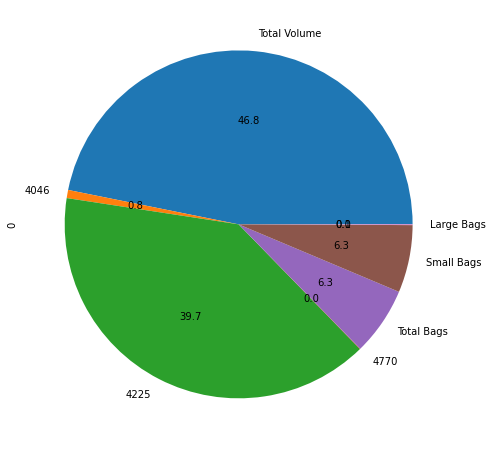

In [91]:
d=df_features.iloc[0]
d.plot.pie(autopct='%.1f',fontsize=10,figsize=(8,8))

- As we can conclude by checking the pie plot that, Total Volume is containing 46.8% of data (highest), Total number of avocados with PLU 4225 sold is containing 39.7% data(2nd highest), and other continuous variables are having rest of the data regarding Average Price of Avacado perspective.


Now let's check the distribution of label column:

Minimum 0.44
Maximum 3.25


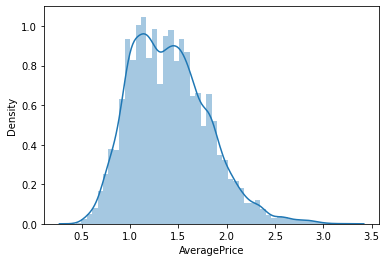

In [92]:
sns.distplot(df['AveragePrice'])
print('Minimum',df['AveragePrice'].min())
print('Maximum',df['AveragePrice'].max())

- The Average price (label data) is little skewed. The maximum price is 3.25 and minimum price is 3.25.

Now let's check the distribution of the continuous features:

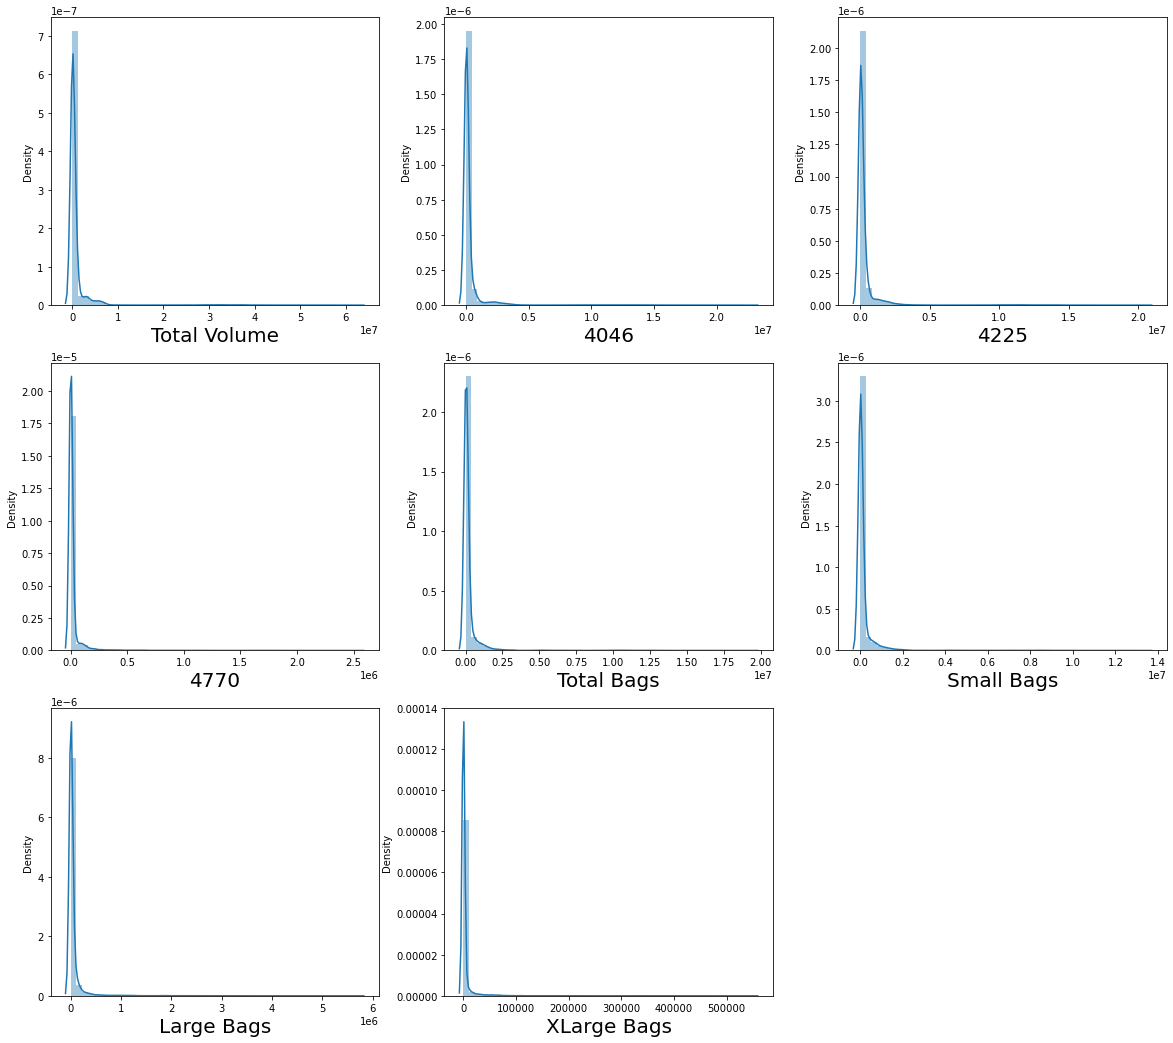

In [93]:
plt.figure(figsize=(20,18),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

- As we have already discussed all the continuous independent variables are very much skewed. 
- The highest value of Total Volume is  6.250565e+07 and the lowest value is 8.456000e+01. Hence, The data is highly right skewed.
- The highest value of PLU 4046 is 2.274362e+07 and lowest value is 0.000000e+00 that means the data is right skewed. And presence of '0' is not possible. So, we need to take care of the minimum value. 
- The highest value of PLU 4225 is 2.047057e+07 and lowest value is 0.000000e+00 that means the data is right skewed. And presence of '0' is not possible. So, we need to take care of the minimum value.
- The highest value of PLU 4770 is 2.546439e+06 and lowest value is 0.000000e+00 that means the data is right skewed. And presence of '0' is not possible. So, we need to take care of the minimum value.
- The highest value of Total Bags is 1.937313e+07 and lowest value is 0.000000e+00 that means the data is right skewed. And presence of '0' is not possible. So, we need to take care of the minimum value.
- The highest value of Small Bags is 1.338459e+07 and lowest value is 0.000000e+00 that means the data is right skewed. And presence of '0' is not possible. So, we need to take care of the minimum value.
- The highest value of Large Bags is 5.719097e+06 and lowest value is 0.000000e+00 that means the data is right skewed. And presence of '0' is not possible. So, we need to take care of the minimum value.
- The highest value of Large Bags is 551693.650000 and lowest value is 0.000000 and it's interquartile range is also showing 0.000000 that means the data is right skewed. And presence of '0' is not possible. So, we need to take care of the minimum value.
 We are going to deal with the skewness during data cleaning.
 
Now it's time to check the categorical variables as well: 

In [94]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

- So, there are two kinds of hass avocadoes present one is coventinal and organic and these varieties are containing 9126 and 9123 Avocados respectively. 

let's visualize the data:

<AxesSubplot:xlabel='type', ylabel='count'>

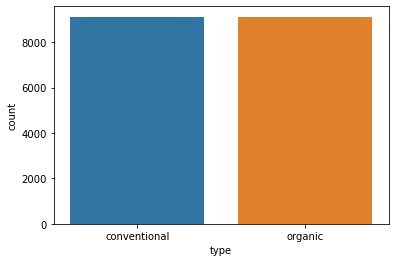

In [95]:
sns.countplot(df['type'])

<AxesSubplot:ylabel='type'>

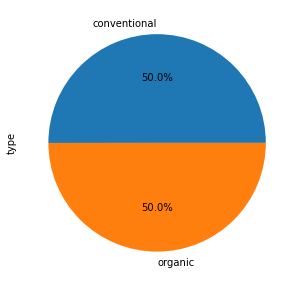

In [96]:
plt.figure(figsize=(15,5))
df['type'].value_counts().plot.pie(autopct='%1.1f%%')

- There is no imbalance in the type data.

Now let's check the year Variable:

In [97]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

- The data of 4 different years regarding Avacado is present(2015 to 2018). Most of the data is from 2017 and followed by 2016 and 2017 and 2018 has the least data.

Let's visualize the Year data:

<AxesSubplot:xlabel='year', ylabel='count'>

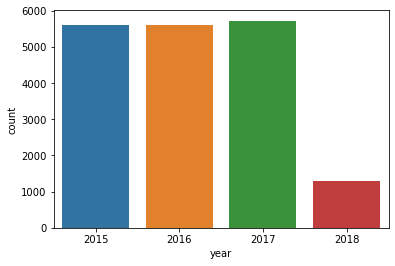

In [98]:
sns.countplot(df['year'])

<AxesSubplot:ylabel='year'>

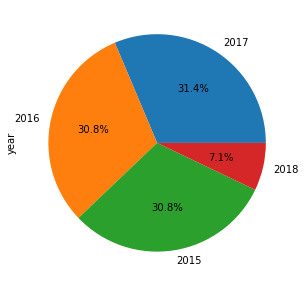

In [99]:
plt.figure(figsize=(15,5))
df['year'].value_counts().plot.pie(autopct='%1.1f%%')

- As we have already seen 2015, 2016 and 2017 are having highest data regarding avacados and 2018 has least data.

Let's check the Region variable:

In [100]:
df['region'].value_counts()

Jacksonville           338
Houston                338
Philadelphia           338
Spokane                338
GrandRapids            338
GreatLakes             338
BuffaloRochester       338
Charlotte              338
SanDiego               338
DallasFtWorth          338
Tampa                  338
California             338
Pittsburgh             338
Columbus               338
Albany                 338
SouthCentral           338
HartfordSpringfield    338
MiamiFtLauderdale      338
Midsouth               338
CincinnatiDayton       338
Roanoke                338
HarrisburgScranton     338
TotalUS                338
West                   338
Nashville              338
BaltimoreWashington    338
NorthernNewEngland     338
PhoenixTucson          338
Louisville             338
NewOrleansMobile       338
Syracuse               338
Southeast              338
SanFrancisco           338
LasVegas               338
Denver                 338
RichmondNorfolk        338
SouthCarolina          338
P

- Each of the region is having same amount of data i.e 338 except WestTexNewMexico is having 335 count.

Let's visualize it:

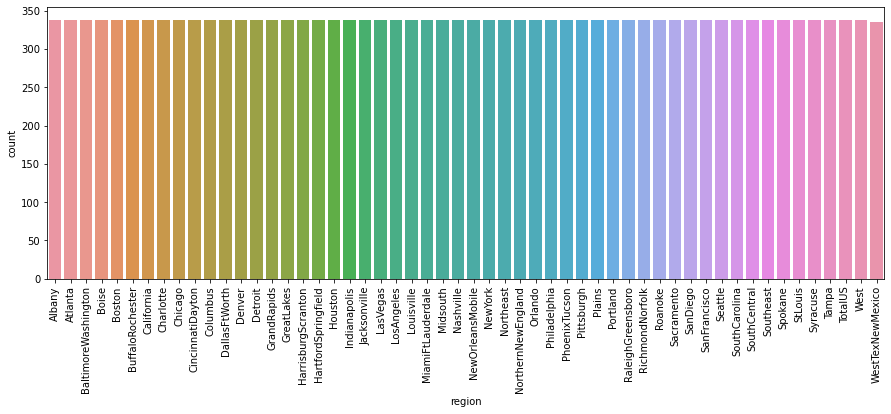

In [101]:
plt.figure(figsize=(15,5))
sns.countplot(df['region'])
plt.xticks(rotation=90)
plt.show()

- As we can see all the regions are having same amount of data except westtexnewmexico.



#### Let's check the outliers as well:

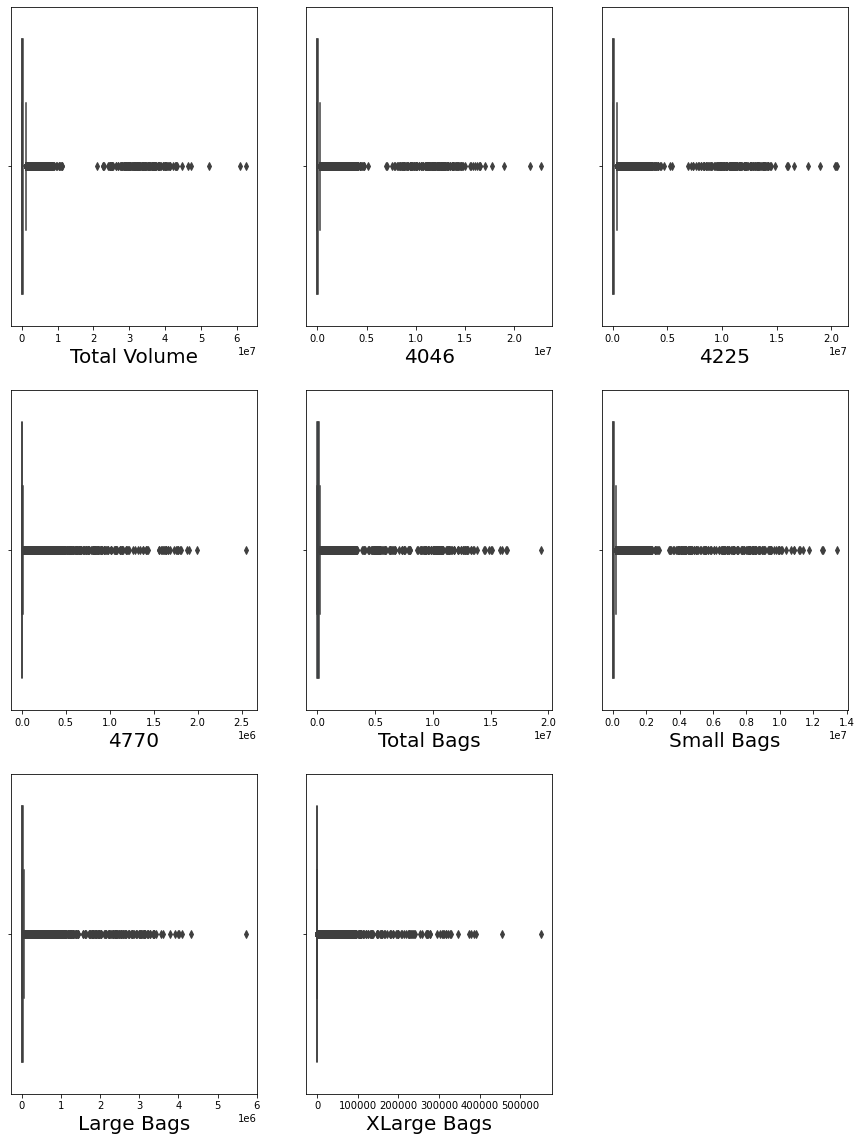

In [102]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df_features[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- As we can see all the continuous features are having huge amount of outliers which we need to take care during data cleaning before model creation.

#### Bivariate Analysis:

We need to check Relation between feature vs label for that we need to divide the dataset and analyze.

In [103]:
#Dividing Dataset into Features and Label:

y=df['AveragePrice']
x=df.drop(columns=['AveragePrice'])

Let's visualize the relations:

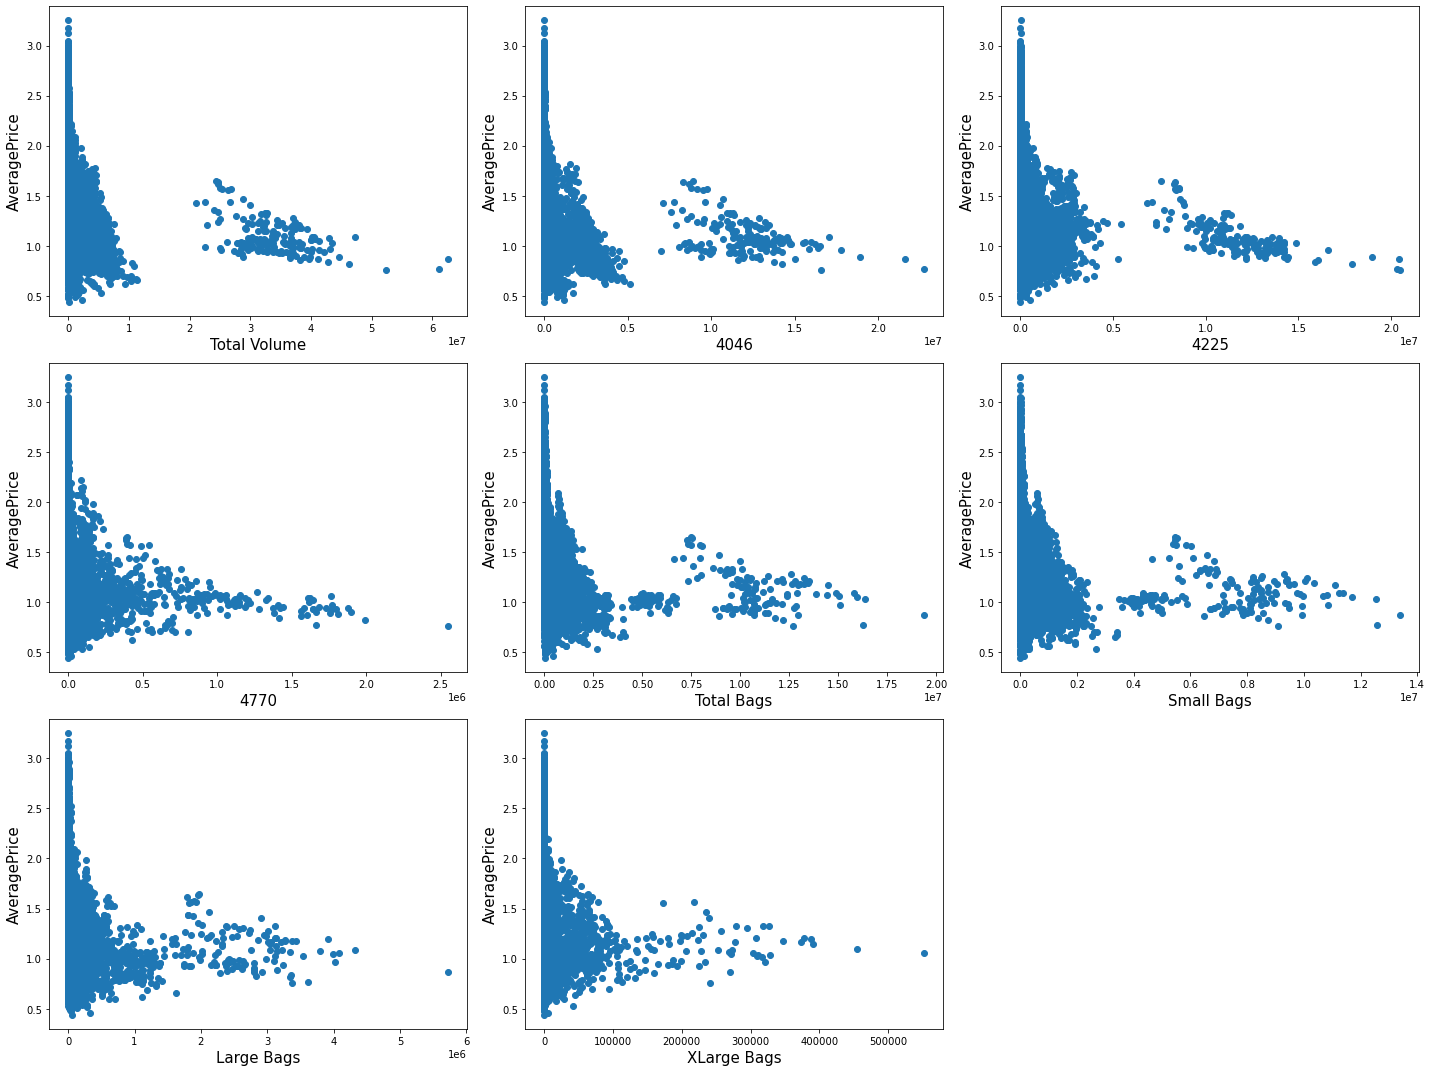

In [104]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(df_features[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('AveragePrice',fontsize=15)
    plotnumber+=1
plt.tight_layout()

- The relation between the Average price and each of the continuous variable is negatively correlated as increase in 'Total Volume','4046', '4225', '4770','Total Bags','Small Bags','Large Bags','XLarge Bags' is making the Average price decrease.

Now let's check the relation between categorical data vs label as well:

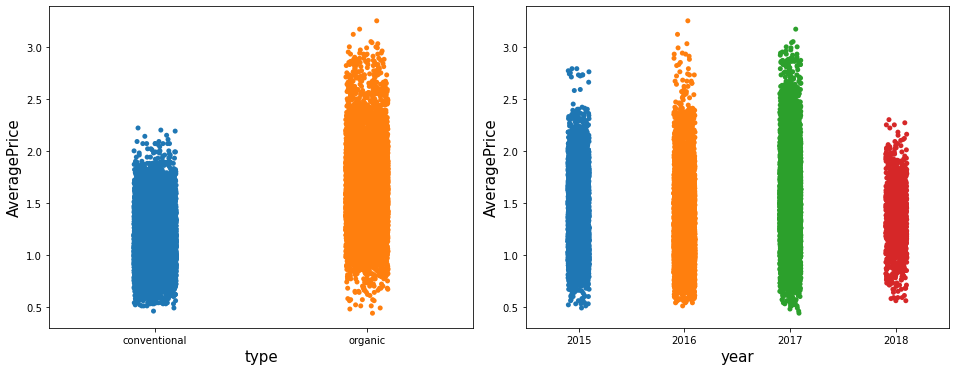

In [105]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_cat_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(df_cat_features[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('AveragePrice',fontsize=15)
    plotnumber+=1
plt.tight_layout() 

- As we can see the average price of Organic avocados are more than conventional avacadoes.
- As the demand of avacadoes in the year 2017 is highest hence the price is also high than other years.

Let's check the relation between Region and Average Price:

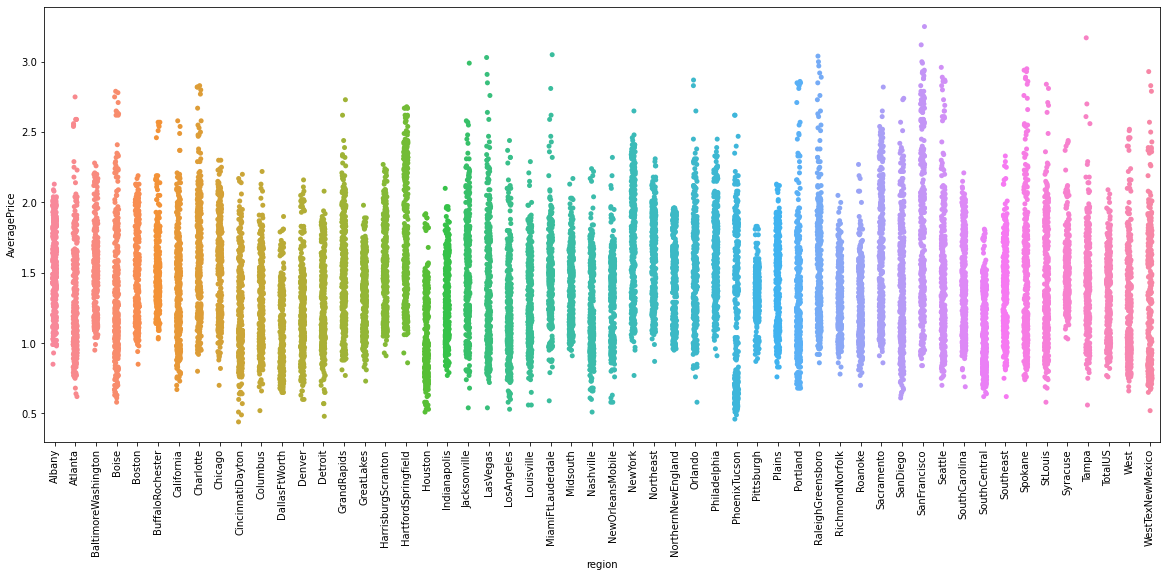

In [106]:
plt.figure(figsize=(20,8))
sns.stripplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)
plt.show()

- Sanfansisco,RaleighGreensboro, Seattle, portland these regions are having highest average price of Avacados.

Let's check the relation between Total Volume with other continuous features.

In [107]:
df_volume=df[['Total Volume']]  #taking total volume in a sigle variable for visualization

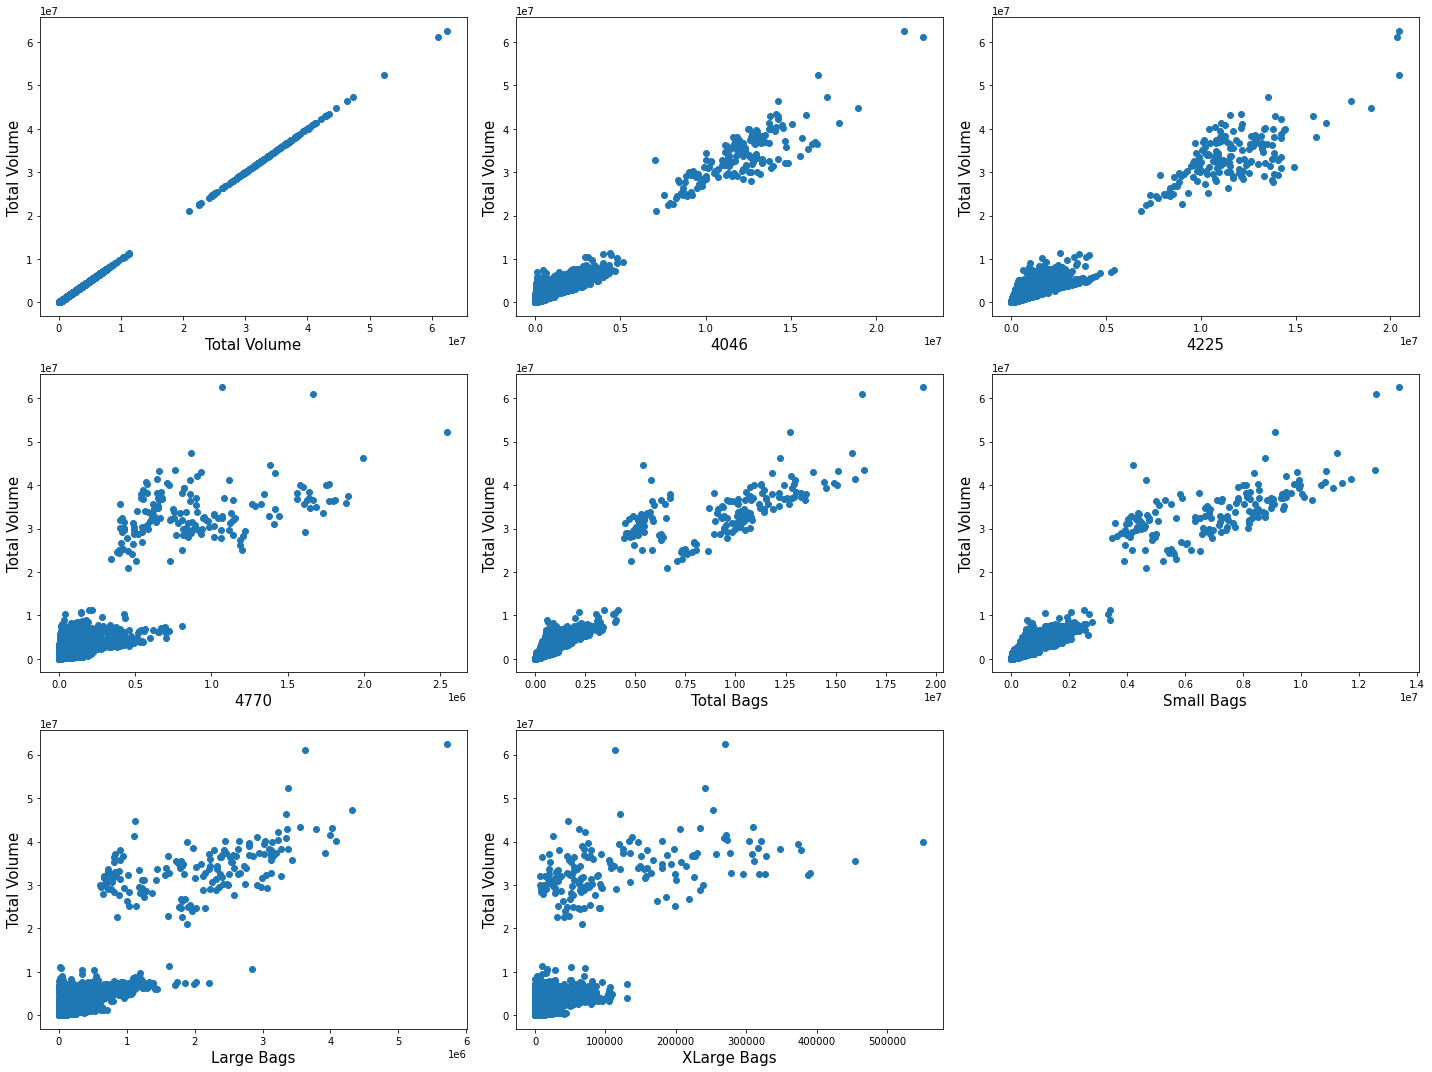

In [108]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(df_features[column],df_volume)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Total Volume',fontsize=15)
    plotnumber+=1
plt.tight_layout()

- As the volume quantity increases the PLU as well as types of bags increases as total volume is related to quantity.

Let's check the relations between continuous features and year:

In [109]:
df_year=df[['year']] #instantiating the year variable into single variable for visualization

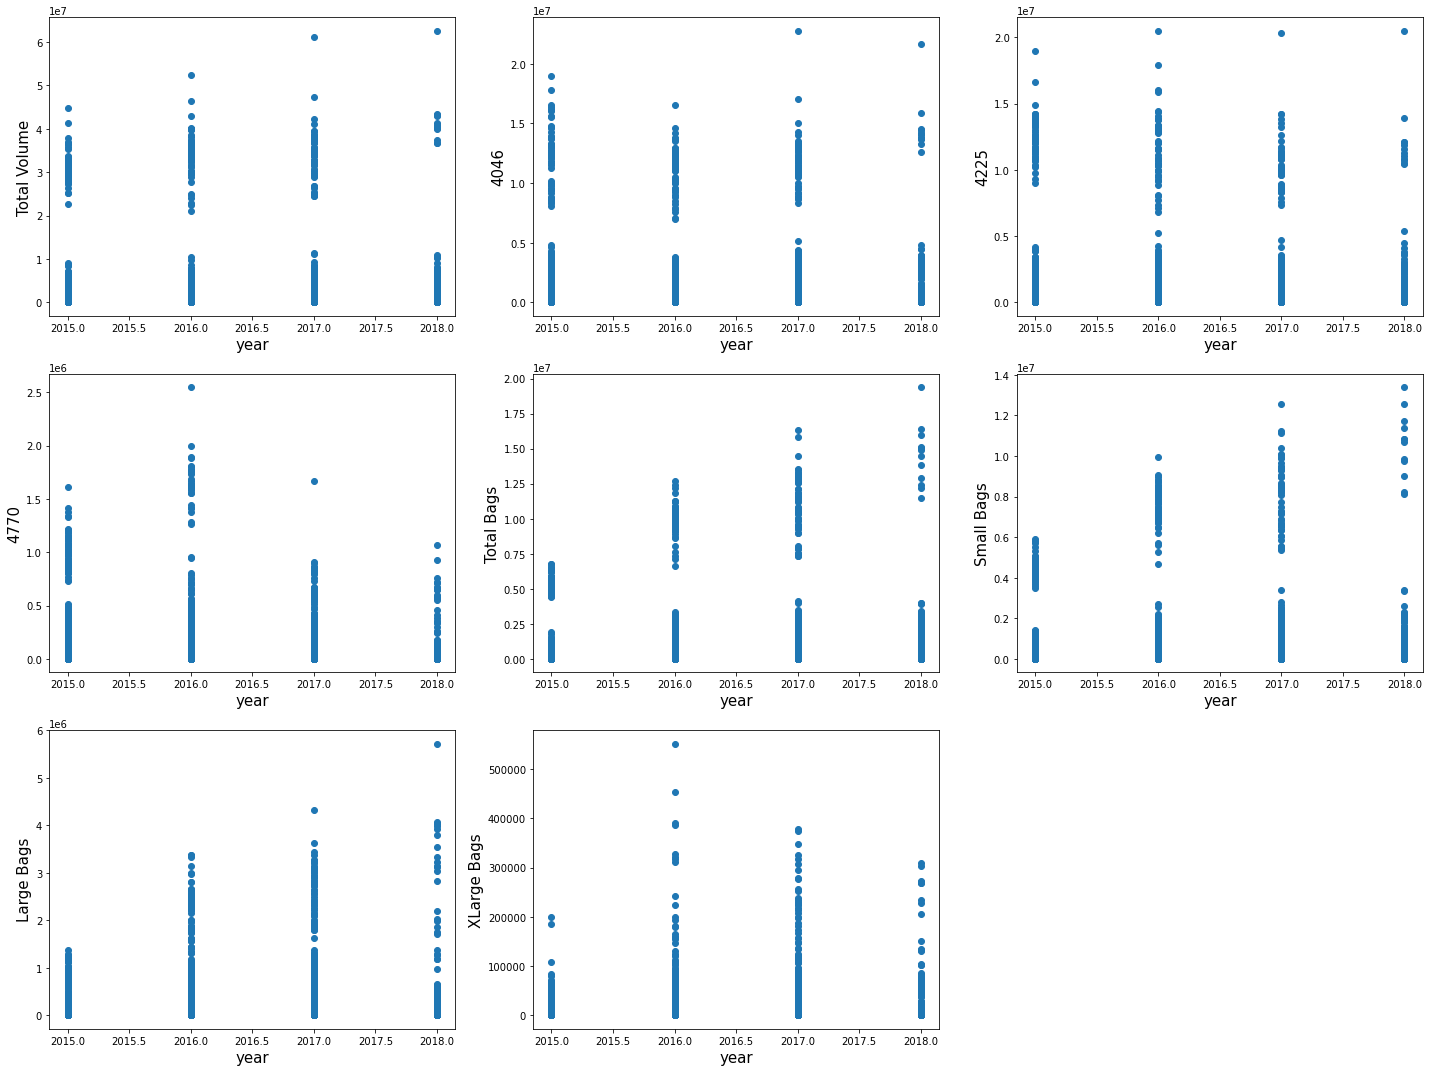

In [110]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(df_year,df_features[column])
        plt.xlabel('year',fontsize=15)
        plt.ylabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

- Total Volume data is more or less similer in all the years.
- PLU 4046 data is  more or less similer in all the years.
- PLU 4225 data is more or less similer in all the years.
- PLU 4770 data is highest in 2016, 2nd highest in 2015.
- Total Bags data is hightest in 2018 following by 2017,2016,2015.
- though 2018 has least data but small bags,large bags are highest in 2018.
- XLarge Bags are highest in 2016.


Let's visualize which region is having the highest bags:

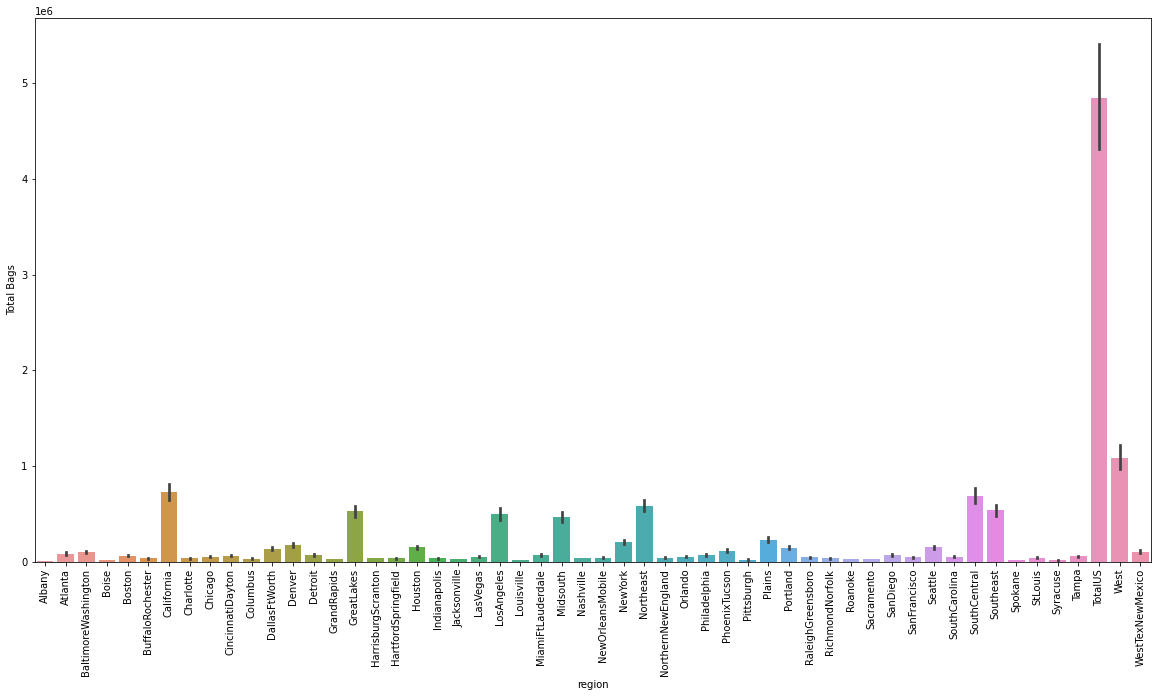

In [111]:
plt.figure(figsize=(20,10))
sns.barplot(x='region',y='Total Bags',data=df)
plt.xticks(rotation=90)
plt.show()

- Total US is having the highest Total Bags data.

let's visualize the region which is having the highest Total Volume:

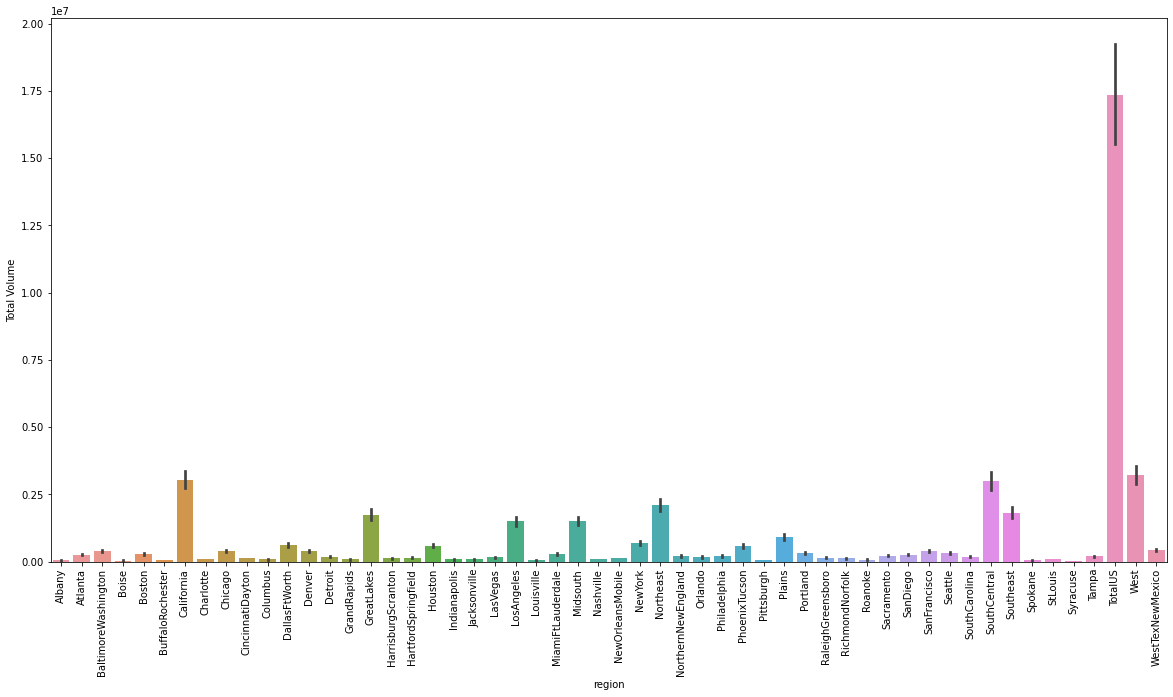

In [112]:
plt.figure(figsize=(20,10))
sns.barplot(x='region',y='Total Volume',data=df)
plt.xticks(rotation=90)
plt.show()

- It's obvious that if a region is having highest total bags , it's having the highest volume as well.

#### Multivariate Analysis:

Let's check the relations between features vs featues and features vs label and multicolinearity between them.

<AxesSubplot:xlabel='Total Volume', ylabel='Total Bags'>

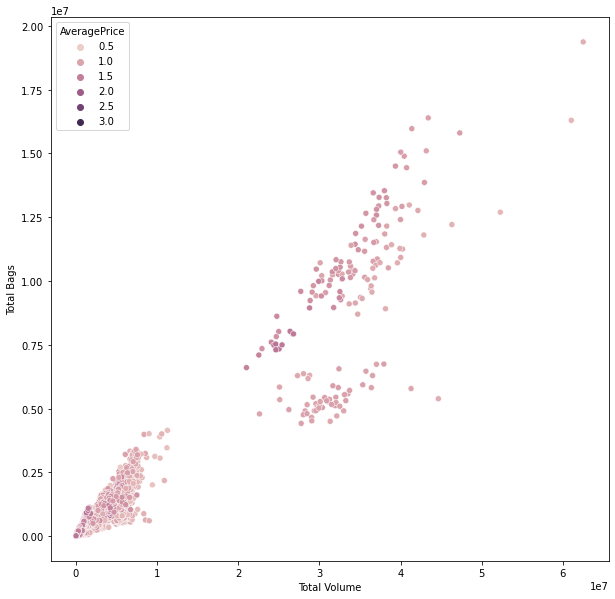

In [113]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Total Volume',y='Total Bags',hue='AveragePrice',data=df)

- It seems that as the Total Volume increases the Total Bags increases but the Average Price of Avacados decreases.

<AxesSubplot:xlabel='Total Bags', ylabel='4046'>

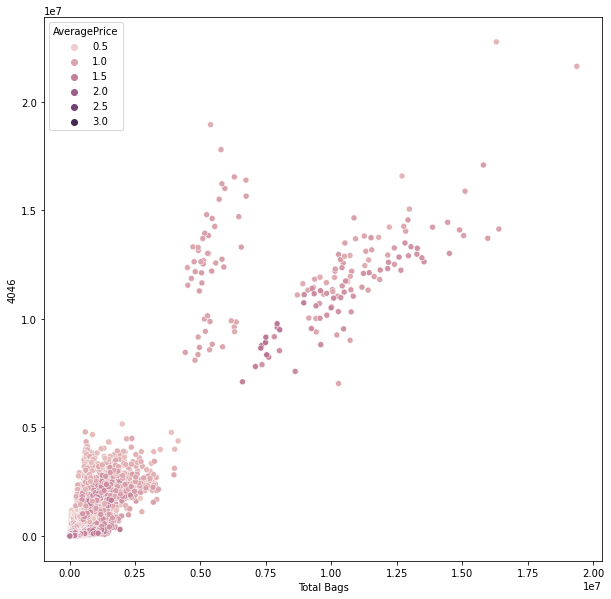

In [114]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Total Bags',y='4046',hue='AveragePrice',data=df)

- It seems as the Total Bags increases PLU 4046 increases as well but the Average Price decreases.

<AxesSubplot:xlabel='Total Bags', ylabel='4770'>

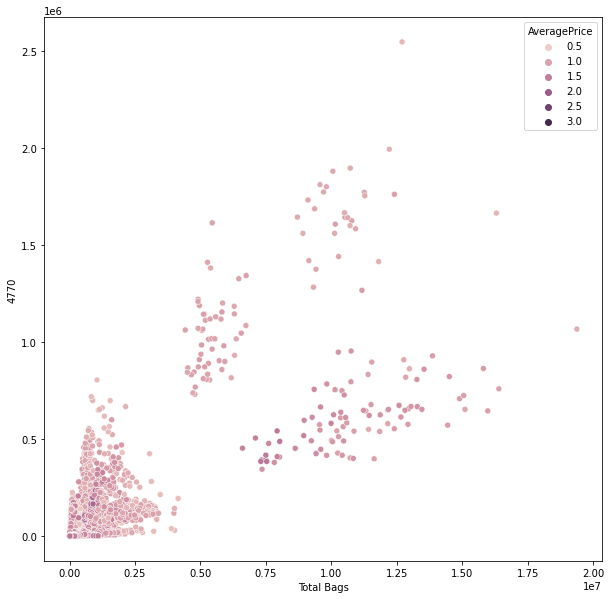

In [115]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Total Bags',y='4770',hue='AveragePrice',data=df)

- It seems as the Total Bags increases PLU 4770 increases as well but the Average Price decreases.


Now it's time to check the correlation as well:

In [46]:
corr = df.corr()
corr

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


#### Heatmap (Correlation Matrix):

Let's find the coefficient of multicolinearty to check if any feature is corelated to another featue or not.

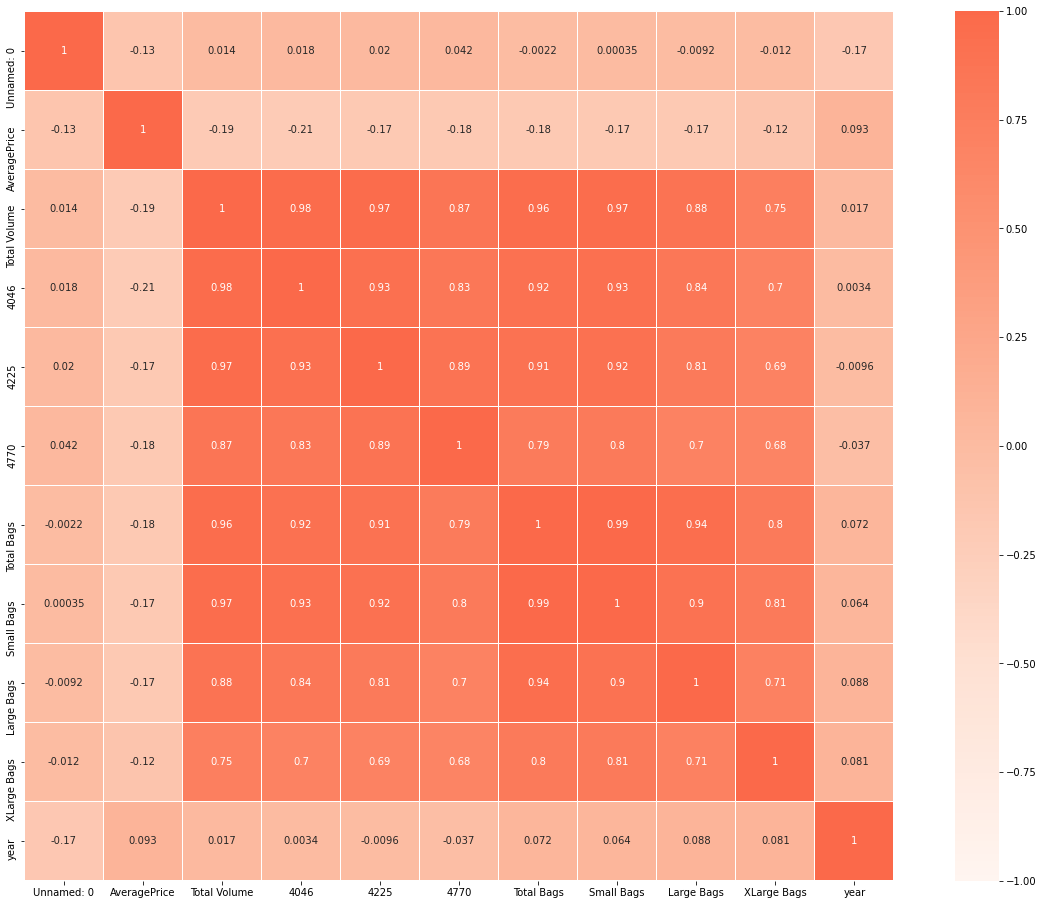

In [47]:
plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='Reds',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

- As we can see Average Price is showing positive correlation with the variable year only. Other than that Average Price is negatively correlated with each of the variables.
- Most of the variables are correlated as well so we need to get rid of multicolinearity also.

#### Data cleaning and Outlier Removal:

Let's first drop those unimportant columns first.

In [124]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [125]:
df.drop(['year'],axis=1,inplace=True)

In [127]:
df.drop(['XLarge Bags'],axis=1,inplace=True)

In [128]:
df.skew()  #Checking the skewness before removing it

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
dtype: float64

Let's replace the zero values of different continuous variables first with it's median value as these columns are containing so many outliers .

In [129]:
df['4046']=df['4046'].replace(0,df['4046'].median())
df['4225']=df['4225'].replace(0,df['4225'].median())
df['4770']=df['4770'].replace(0,df['4770'].median())
df['Total Bags']=df['Total Bags'].replace(0,df['Total Bags'].median())
df['Small Bags']=df['Small Bags'].replace(0,df['Small Bags'].median())
df['Large Bags']=df['Large Bags'].replace(0,df['Large Bags'].median())

Now it's time to remove the skewness from the continuous features by using Log Transformer.

In [130]:
df['Total Volume']=np.log(df['Total Volume'])
df['4046']=np.log(df['4046'])
df['4225']=np.log(df['4225'])
df['4770']=np.log(df['4770'])
df['Total Bags']=np.log(df['Total Bags'])
df['Small Bags']=np.log(df['Small Bags'])
df['Large Bags']=np.log(df['Large Bags'])

After removing the skewness we are going to check the variable closely if those are normally distributed or not.

In [54]:
df_features=df[['Total Volume','4046', '4225', '4770','Total Bags','Small Bags','Large Bags']]
#instantiating continuous features into df_features variable for visualization

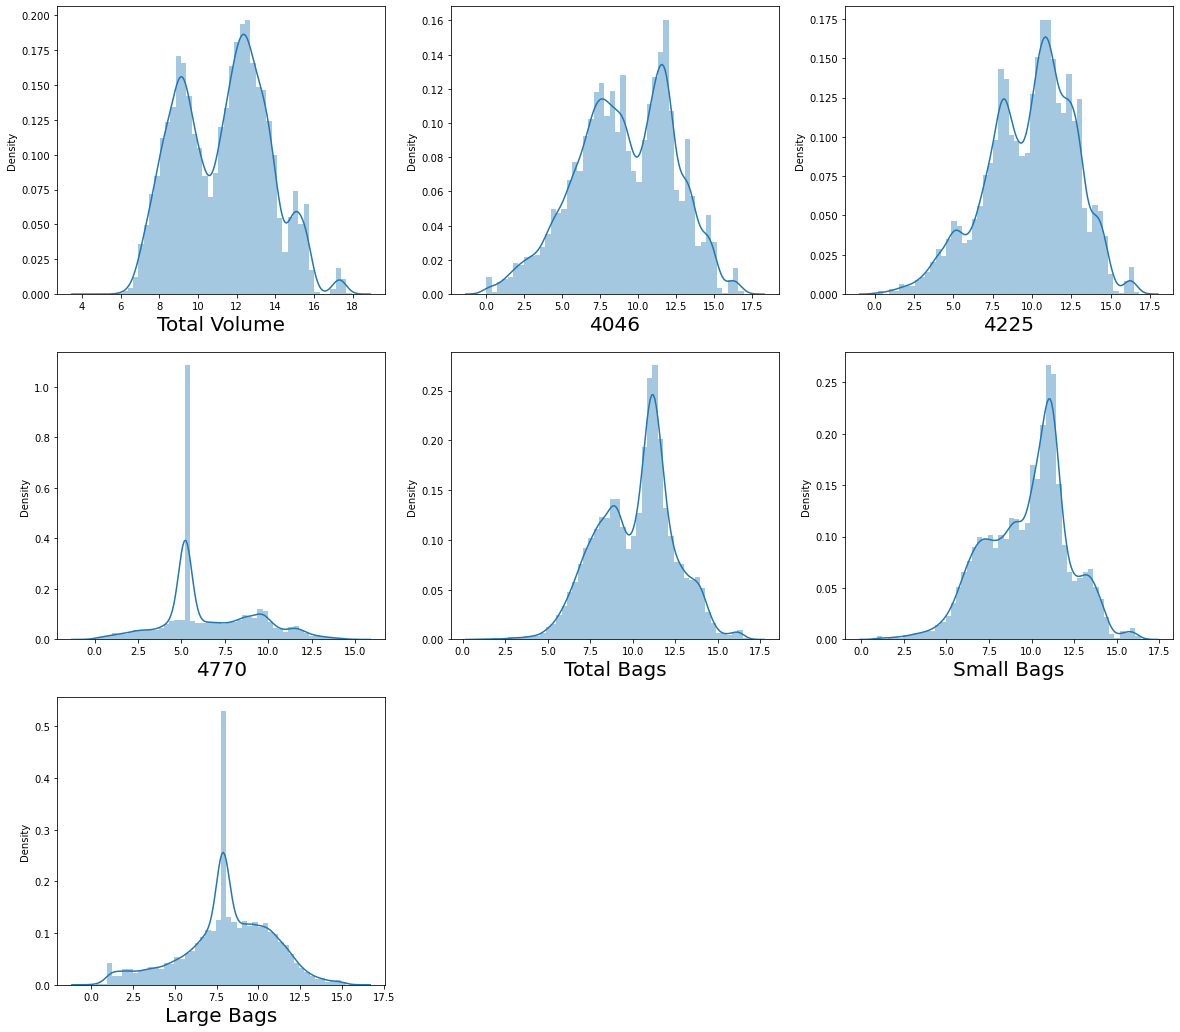

In [55]:
plt.figure(figsize=(20,18),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()   

- Now all the continuous feature variables are looking good and more normally distributed than before.

Now it's time to convert date variable into numerical variable, Let's do it.

#### Feature Engineering:

As date variable is a nominal data we are going to convert it into numbers and then use it for model creation.

In [131]:
import datetime as dt  #importing datetime library

Now let's separate year, month and day respectively:

In [132]:
df['year'] = pd.DatetimeIndex(df['Date']).year 
df['month'] = pd.DatetimeIndex(df['Date']).month 
df['day'] = pd.DatetimeIndex(df['Date']).day 

Let's drop 'Date' column as it's now irrelevent.

In [133]:
df.drop(['Date'],axis=1,inplace=True)

In [134]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,region,year,month,day
0,1.33,11.070329,6.943836,10.905127,3.874529,9.070718,9.059938,4.535284,conventional,Albany,2015,12,27
1,1.35,10.912849,6.513645,10.706359,4.066117,9.159632,9.149323,4.579750,conventional,Albany,2015,12,20
2,0.93,11.680304,6.677965,11.600475,4.871373,9.005202,8.992459,4.636087,conventional,Albany,2015,12,13
3,1.08,11.277104,7.031741,11.184094,4.284689,8.667535,8.644249,4.896047,conventional,Albany,2015,6,12
4,1.28,10.840357,6.847453,10.688265,4.327834,8.729713,8.697222,5.286700,conventional,Albany,2015,11,29


- As we can see year, month, day of the date column is separated with each other.

Now let's visualize Which month is having best Average Price of Avacado:

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

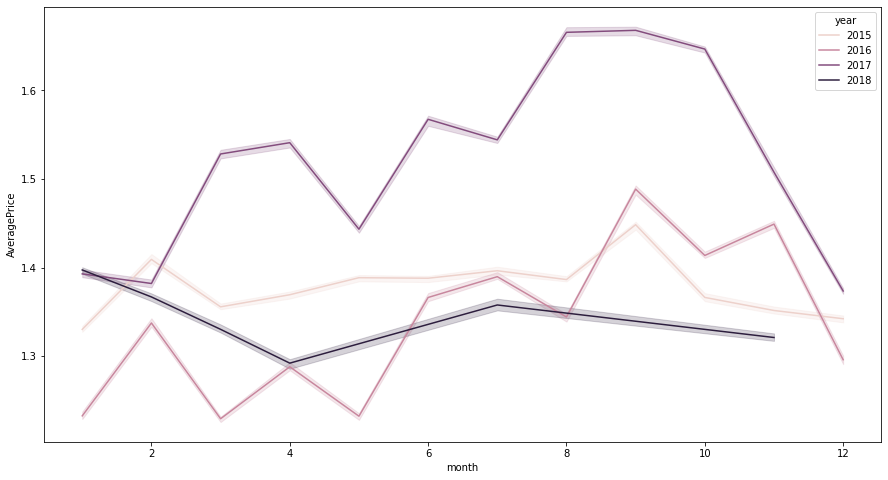

In [135]:
plt.figure(figsize=(15,8))
sns.lineplot(x='month',y='AveragePrice',hue='year',ci=18,data=df)

- Highest Average Price of Avacado is showing in the month of September and october regarding the year 2015,2016,2017,2018.

Now we are going to combine year, month and day together to get one numerical feature. And for that we need to covert the years into single numbers chronologically as it will be very helpful.

In [136]:
#convertion of years
df['year'].replace(2015,1,inplace=True)
df['year'].replace(2016,2,inplace=True)
df['year'].replace(2017,3,inplace=True)
df['year'].replace(2018,4,inplace=True)

now it's time to combine the month,year,day column to make a single numerical feature that we can use in our model creation.

In [137]:
df['Time']=(df['year']*365)+(df['month']*30)+(df['day'])

Now we need to drop the month,year,day columns after conversion.

In [138]:
df.drop(['year','month','day'],axis=1,inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,region,Time
0,1.33,11.070329,6.943836,10.905127,3.874529,9.070718,9.059938,4.535284,conventional,Albany,752
1,1.35,10.912849,6.513645,10.706359,4.066117,9.159632,9.149323,4.579750,conventional,Albany,745
2,0.93,11.680304,6.677965,11.600475,4.871373,9.005202,8.992459,4.636087,conventional,Albany,738
3,1.08,11.277104,7.031741,11.184094,4.284689,8.667535,8.644249,4.896047,conventional,Albany,557
4,1.28,10.840357,6.847453,10.688265,4.327834,8.729713,8.697222,5.286700,conventional,Albany,724


- As we can see there is a column called 'Time' which is the combination of month,year and day column.

#### Encoding:

Now we need to encode all the nominal columns into numerical variables using Ordinal encoder.

In [139]:
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,region,Time
0,1.33,11.070329,6.943836,10.905127,3.874529,9.070718,9.059938,4.535284,0.0,0.0,752
1,1.35,10.912849,6.513645,10.706359,4.066117,9.159632,9.149323,4.579750,0.0,0.0,745
2,0.93,11.680304,6.677965,11.600475,4.871373,9.005202,8.992459,4.636087,0.0,0.0,738
3,1.08,11.277104,7.031741,11.184094,4.284689,8.667535,8.644249,4.896047,0.0,0.0,557
4,1.28,10.840357,6.847453,10.688265,4.327834,8.729713,8.697222,5.286700,0.0,0.0,724
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745361,7.624111,7.332500,5.220302,9.510346,9.477831,6.068078,1.0,53.0,1582
18245,1.71,9.538783,7.083136,8.140753,5.220302,9.133982,9.098295,5.783210,1.0,53.0,1518
18246,1.87,9.530012,7.083321,7.804981,6.590219,9.147838,9.143324,3.745023,1.0,53.0,1511
18247,1.93,9.693089,7.331473,8.000028,6.588940,9.302878,9.298309,3.912023,1.0,53.0,1504


- As we can see our data is ready for model creation as all the nominal columns are encoded.

In [140]:
df.skew()

AveragePrice    0.580303
Total Volume    0.087954
4046           -0.227620
4225           -0.423405
4770            0.414673
Total Bags     -0.163016
Small Bags     -0.311275
Large Bags     -0.416205
type            0.000329
region          0.000030
Time            0.102720
dtype: float64

- As we can see all the variables are without skewness now it's time to divide the dataset into features and label for model creation.

In [141]:
y=df['AveragePrice']
x=df.drop(columns=['AveragePrice'])

#### Standardization:

In [142]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Let's check the VIF as well:

In [143]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,40.876012,Total Volume
1,5.550708,4046
2,7.788094,4225
3,2.132868,4770
4,18.612688,Total Bags
5,9.334206,Small Bags
6,1.950508,Large Bags
7,2.939716,type
8,1.109977,region
9,1.242938,Time


We are going to drop Total volume column as  it is correlated with each of the features.

In [144]:
x.drop(['Total Volume'],axis=1,inplace=True)

In [145]:
x.head()

,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,region,Time
0,6.943836,10.905127,3.874529,9.070718,9.059938,4.535284,0.0,0.0,752
1,6.513645,10.706359,4.066117,9.159632,9.149323,4.579750,0.0,0.0,745
2,6.677965,11.600475,4.871373,9.005202,8.992459,4.636087,0.0,0.0,738
3,7.031741,11.184094,4.284689,8.667535,8.644249,4.896047,0.0,0.0,557
4,6.847453,10.688265,4.327834,8.729713,8.697222,5.286700,0.0,0.0,724


- As we can see we have successfully dropped the Total volume column.

- We are not going to drop any other column as may it cause data loss.


 ##### Hold Out Method:

Model will be built on Hold Out method (75/25 training and test split) to gauge how well the Regressor is working.

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=21)

 ### Model Creation:

Now we are going to build 6 different models. And let's check which one is giving us the best Accuray. Those models are:

1. LinearRegression
2. KNeiborsRegressor
3. RandomForestRegressor
4. Gradient Boosting Regressor
5. Decision Tree Regresor
6. Ada-Boost Regressor
7. XGBRegressor


##### 1. Linear Rgression:

In [147]:
#Model Training:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [148]:
#Model Prediction with trained data:
y_lr_pred = lr.predict(x_train)

In [149]:
print("R Square Score of lr:",metrics.r2_score(y_train,y_lr_pred))

R Square Score of lr: 0.5141506568686675


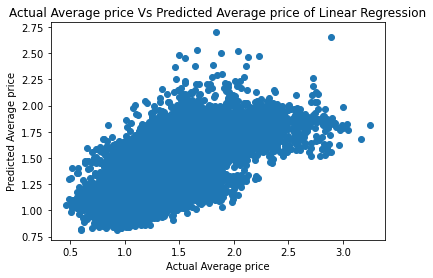

In [150]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_lr_pred)
plt.xlabel('Actual Average price')
plt.ylabel('Predicted Average price')
plt.title('Actual Average price Vs Predicted Average price of Linear Regression')
plt.show()

In [151]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(x_test)

###### Evaluation of LR:

In [152]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)
print('Accuracy of LR :',lr_accuracy*100)

R Square Score of Linear Regression: 0.5084862471647824
Accuracy of LR : 50.84862471647824


In [153]:
print ('mean absolute error of linear regression is: ',mean_absolute_error(y_test,y_test_lr_pred))

mean absolute error of linear regression is:  0.21759589547145558


In [154]:
print ('mean squared error of linear regression is: ',mean_squared_error(y_test,y_test_lr_pred))

mean squared error of linear regression is:  0.08002030486113075


In [155]:
print ('Root mean squared error of linear regression is: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))

Root mean squared error of linear regression is:  0.28287860445981194


- ##### Scores of Linear Regression:

1. Accuracy of LR - 0.5084862471647824
2. MAE of LR -  0.21759589547145558
3. MSE of LR -  0.08002030486113075
4. RMSE of LR - 0.28287860445981194

#### 2. KNeighbors Regressor:

In [156]:
#Model Training:

kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [157]:
#Model Prediction with trained data:
y_kn_pred = kn.predict(x_train)

In [158]:
print("R Square Score of kn:",metrics.r2_score(y_train,y_kn_pred))

R Square Score of kn: 0.6508916666299536


<function matplotlib.pyplot.show(close=None, block=None)>

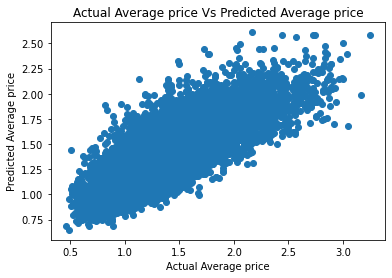

In [159]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_kn_pred)
plt.xlabel('Actual Average price')
plt.ylabel('Predicted Average price')
plt.title('Actual Average price Vs Predicted Average price')
plt.show

In [160]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)

##### Evaluation of K-Neighbors Regressor:

In [161]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)
print('Accuracy of KNN :',kn_accuracy*100)

R Square Score of K-Neighbors Regressor: 0.4559289419971988
Accuracy of KNN : 45.59289419971988


In [162]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  0.2296563664255972


In [163]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  0.08857683366206442


In [164]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  0.297618604361462


#### Scores of K-Neighbors Regressor:

1.    Accuracy - 0.4559289419971988
2.    MAE of KNN - 0.2296563664255972
3.    MSE of KNN - 0.08857683366206442
4.    RMSE of KNN - 0.297618604361462

#### 3. Random Forest Regressor:

In [165]:
#Model Training:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [166]:
#Model Prediction with trained data:
y_rf_pred = rf.predict(x_train)

In [167]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rf_pred))

R Square Score of Random Forest Regressor: 0.9771523599313184


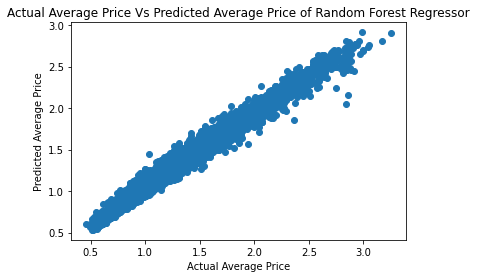

In [169]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rf_pred)
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('Actual Average Price Vs Predicted Average Price of Random Forest Regressor')
plt.show()

In [170]:
# Predicting test data with model:
y_test_rf_pred = rf.predict(x_test)

##### Evaluation of Random Forest Regressor:

In [171]:
rf_accuracy = metrics.r2_score(y_test,y_test_rf_pred)
print("R Square Score of Random Forest Regressor:",rf_accuracy)
print('Accuracy of RFR :',rf_accuracy*100)

R Square Score of Random Forest Regressor: 0.8420462774986126
Accuracy of RFR : 84.20462774986126


In [172]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rf_pred))

mean absolute error of Random Forest Regressor:  0.11027177295638832


In [173]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rf_pred))

mean squared error of Random Forest Regressor is:  0.02571546565198334


In [174]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rf_pred)))

Root mean squared error of Random Forest Regressor is:  0.1603604242074189


##### Scores of Random Forest Regressor:

1.    Accuracy of RFR : 0.8420462774986126
2.    MAE of RFR :  0.11027177295638832
3.    MSE of RFR : 0.02571546565198334
4.    RMSE of RFR : 0.1603604242074189

#### 4. Ada-Boost Regressor:

In [175]:
# Model Training:
abr = AdaBoostRegressor()
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [176]:
#Model Prediction with trained data:
y_abr_pred = abr.predict(x_train)

In [177]:
print("R Square Score of Ada-Boost Regressor:",metrics.r2_score(y_train,y_abr_pred))

R Square Score of Ada-Boost Regressor: 0.512213219869402


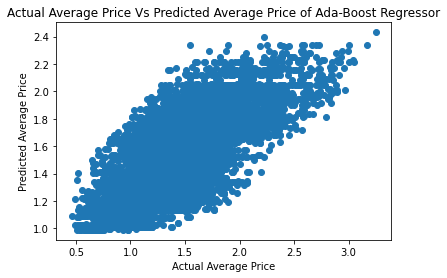

In [179]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_abr_pred)
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('Actual Average Price Vs Predicted Average Price of Ada-Boost Regressor')
plt.show()

In [180]:
# Predicting test data with model:
y_test_abr_pred = abr.predict(x_test)

##### Evaluation of Ada-Boost Regressor:

In [181]:
abr_accuracy = metrics.r2_score(y_test,y_test_abr_pred)
print("R Square Score of Ada-Boost Regressor:",abr_accuracy)
print('Accuracy of ABR :',abr_accuracy*100)

R Square Score of Ada-Boost Regressor: 0.4861028706275611
Accuracy of ABR : 48.61028706275611


In [182]:
print ('mean absolute error of Ada-Boost Regressor: ',mean_absolute_error(y_test,y_test_abr_pred))

mean absolute error of Ada-Boost Regressor:  0.2328731823498156


In [183]:
print ('mean squared error of Ada-Boost Regressor is: ',mean_squared_error(y_test,y_test_abr_pred))

mean squared error of Ada-Boost Regressor is:  0.08366440353384973


In [184]:
print ('Root mean squared error of Ada-Boost Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_abr_pred)))

Root mean squared error of Ada-Boost Regressor is:  0.28924799659435796


##### Scores of Ada-Boost Regressor:

1.    Accuracy of ABR : 0.4861028706275611
2.    MAE of ABR : 0.2328731823498156
3.    MSE of ABR : 0.08366440353384973
4.    RMSE of ABR : 0.28924799659435796

#### 5. Gradient Boosting Regressor:

In [185]:
# Model Training:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [186]:
#Model Prediction with trained data:
y_gbr_pred = gbr.predict(x_train)

In [187]:
print("R Square Score of Gradient Boosting Regressor: ",metrics.r2_score(y_train,y_gbr_pred))

R Square Score of Gradient Boosting Regressor:  0.7304471898193414


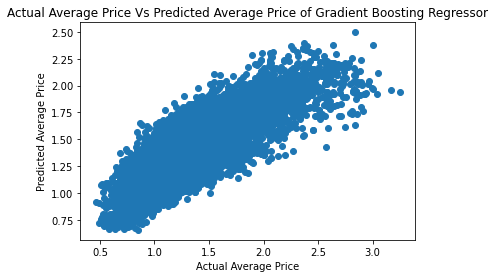

In [197]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_gbr_pred)
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('Actual Average Price Vs Predicted Average Price of Gradient Boosting Regressor')
plt.show()

In [189]:
# Predicting test data with model:
y_test_gbr_pred = gbr.predict(x_test)

##### Evaluation of Gradient Boosting Regressor:

In [190]:
gbr_accuracy = metrics.r2_score(y_test,y_test_gbr_pred)
print("R Square Score of Gradient Boosting Regressor:",gbr_accuracy)
print('Accuracy of GBR :',gbr_accuracy*100)

R Square Score of Gradient Boosting Regressor: 0.704515365686704
Accuracy of GBR : 70.4515365686704


In [191]:
print ('mean absolute error of Gradient Boosting Regressor: ',mean_absolute_error(y_test,y_test_gbr_pred))

mean absolute error of Gradient Boosting Regressor:  0.16326693079931562


In [192]:
print ('mean squared error of Gradient Boosting Regressor is: ',mean_squared_error(y_test,y_test_gbr_pred))

mean squared error of Gradient Boosting Regressor is:  0.0481060201940203


In [193]:
print ('Root mean squared error of Gradient Boosting Regressor: ',np.sqrt(mean_squared_error(y_test,y_test_gbr_pred)))

Root mean squared error of Gradient Boosting Regressor:  0.2193308464261703


##### Scores of Gradient Boosting Regressor:

1.    Accuracy of GBR : 0.704515365686704
2.    MAE of GBR : 0.16326693079931562
3.    MSE of GBR : 0.0481060201940203
4.    RMSE of GBR : 0.2193308464261703

##### 6. Decision Tree Regressor:

In [194]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [198]:
#Model Prediction with trained data:
y_dt_pred = dt.predict(x_train)

In [199]:
print("R Square Score of Decision Tree Regressor: ",metrics.r2_score(y_train,y_dt_pred))

R Square Score of Decision Tree Regressor:  1.0


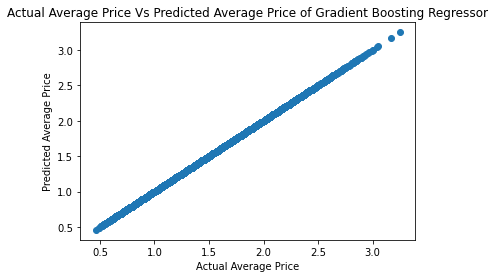

In [200]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_dt_pred)
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('Actual Average Price Vs Predicted Average Price of Gradient Boosting Regressor')
plt.show()

In [201]:
# Predicting test data with model:
y_test_dt_pred = dt.predict(x_test)

##### Evaluation of Decision Tree Regressor:

In [202]:
dt_accuracy = metrics.r2_score(y_test,y_test_dt_pred)
print("R Square Score of Decision Tree Regressor:",dt_accuracy)
print('Accuracy of dt :',dt_accuracy*100)

R Square Score of Decision Tree Regressor: 0.6746597802865449
Accuracy of dt : 67.46597802865449


In [203]:
print ('mean absolute error of Decision Tree Regressor: ',mean_absolute_error(y_test,y_test_dt_pred))

mean absolute error of Decision Tree Regressor:  0.14781284242822704


In [204]:
print ('mean squared error of Decision Tree Regressor: ',mean_squared_error(y_test,y_test_dt_pred))

mean squared error of Decision Tree Regressor:  0.052966622835853606


In [205]:
print ('Root mean squared error of Decision Tree Regressor: ',np.sqrt(mean_squared_error(y_test,y_test_dt_pred)))

Root mean squared error of Decision Tree Regressor:  0.23014478667971952


##### Scores of Decision Tree Regressor:

1.    Accuracy of DT : 0.6746597802865449
2.    MAE of DT : 0.14781284242822704
3.    MSE of DT : 0.052966622835853606
4.    RMSE of DT : 0.23014478667971952


#### 7. XGBRegressor:

In [206]:
xgb=xgb.XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [207]:
#Model Prediction with trained data:
y_xgb_pred = xgb.predict(x_train)

In [208]:
print("R Square Score of xgb:",metrics.r2_score(y_train,y_xgb_pred))

R Square Score of xgb: 0.9523828363640553


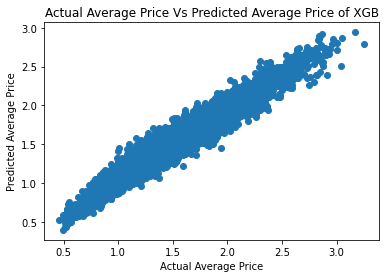

In [230]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_xgb_pred)
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('Actual Average Price Vs Predicted Average Price of XGB')
plt.show()

In [210]:
# Predicting test data with model:
y_test_xgb_pred = xgb.predict(x_test)

##### Evaluation of XGBRegressor:

In [211]:
xgb_accuracy = metrics.r2_score(y_test,y_test_xgb_pred)
print("R Square Score of xgb:",xgb_accuracy)

R Square Score of xgb: 0.8751544715995028


In [212]:
print ('mean absolute error of XGB: ',mean_absolute_error(y_test,y_test_xgb_pred))

mean absolute error of XGB:  0.10226167927518791


In [213]:
print ('mean squared error of  XGB is: ',mean_squared_error(y_test,y_test_xgb_pred))

mean squared error of  XGB is:  0.02032532596601829


In [214]:
print ('Root mean squared error of XGB is: ',np.sqrt(mean_squared_error(y_test,y_test_xgb_pred)))

Root mean squared error of XGB is:  0.14256691750198675


#### Scores of XGB:

1.    Accuracy of XGB : 0.8751544715995028
2.    MAE of XGB : 0.10226167927518791
3.    MSE of XGB : 0.02032532596601829
4.    RMSE of XGB : 0.14256691750198675


##### Regulalization:

When we use regression models to train some data,there is a good chance the model will overfit the given training dataset. Regularization helps to sort this overfitting problem by restricting the degrees of freedom of a given equation. Regularization constraints the weights of features to avoid overfitting

##### Regularization using Lasso:

In [215]:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [216]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

2.1282727900101633e-06

In [217]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.1282727900101633e-06)

In [218]:
lasso_reg.score(x_test,y_test)

0.5084848929122645

##### Regularization Using Ridge:

In [219]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [220]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.001

In [221]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [222]:
ridge_model.score(x_test,y_test)

0.5084862398897618

- Both the Lasso and Ridge are showing the same result of 50% Accuracy as Linear Regression.

 #### Evaluating with Cross Validation:

Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.

In [223]:
lr_cv_score = cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean()*100)

[0.51422447 0.50596535 0.51385308 0.52551613 0.50737699]
mean : 51.33872027166383


In [224]:
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean()*100)

[0.45078137 0.44819428 0.43629605 0.47342013 0.45465448]
mean : 45.26692615172688


In [225]:
rf_cv_score = cross_val_score(rf,x_train,y_train,cv=5,scoring='r2')
print(rf_cv_score)
print('mean :',rf_cv_score.mean()*100)

[0.81038369 0.83444505 0.82383304 0.83356812 0.82167456]
mean : 82.47808926348549


In [226]:
gbr_cv_score = cross_val_score(gbr,x_train,y_train,cv=5,scoring='r2')
print(gbr_cv_score)
print('mean :',gbr_cv_score.mean()*100)

[0.70415819 0.71262231 0.7055314  0.71266271 0.70576622]
mean : 70.81481667491116


In [227]:
abr_cv_score = cross_val_score(abr,x_train,y_train,cv=5,scoring='r2')
print(abr_cv_score)
print('mean :',abr_cv_score.mean()*100)

[0.4871576  0.47893748 0.4807987  0.51676245 0.4985561 ]
mean : 49.24424654688239


In [228]:
dt_cv_score = cross_val_score(dt,x_train,y_train,cv=5,scoring='r2')
print(dt_cv_score)
print('mean :',dt_cv_score.mean()*100)

[0.6121838  0.61689628 0.63091288 0.66956405 0.59660507]
mean : 62.52324157445883


In [229]:
xgb_cv_score = cross_val_score(xgb,x_train,y_train,cv=5,scoring='r2')
print(xgb_cv_score)
print('mean :',xgb_cv_score.mean()*100)

[0.86315666 0.86918375 0.86112375 0.86633103 0.86334774]
mean : 86.46285856504552


#### Selection of the best model for avacado price Prediction:
 Now let's check the difference between Accuracy Scores and Cross Validation Scores of the models to select the best model out of 7 models.

- LR = 50.848-51.338 = -0.49, 
- KNN = 45.592-45.266 = 0.326, 
- RFR = 84.204-82.478 = 1.726, 
- GBR = 70.451-70.814= -0.363,
- DT = 67.465-62.523 = 4.942,
- XGB = 87.515-86.462 = 1.053,
- ABR = 48.610-49.244= -0.634

 ##### Observation:

 Overall the result of all models are mixed. As most of the Accuracy of the Models are between 51-87%.
As the difference between CV score and accuracy score of XGB is less and it's got the best accuracy, we are going to tune it's parameter to obtain best result.

#### Hyperparameter Tuning:

In [236]:
xgbr = xgb.XGBRegressor()
grid_param= {'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective':['reg:squarederror']}

In [237]:
gbr_search=GridSearchCV(xgbr,param_grid=grid_param,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
gbr_search.fit(x_train,y_train)
gbr_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [238]:
xgbr= xgb.XGBRegressor(learning_rate=0.1,max_depth=7,colsample_bytree=0.7,n_estimators=500) 
xgbr.fit(x_train,y_train)
y_pred=xgbr.predict(x_test)

In [239]:
print("*** Accuracy Post Tuning***")
print(metrics.r2_score(y_test,y_pred)*100)

*** Accuracy Post Tuning***
90.39698550293619


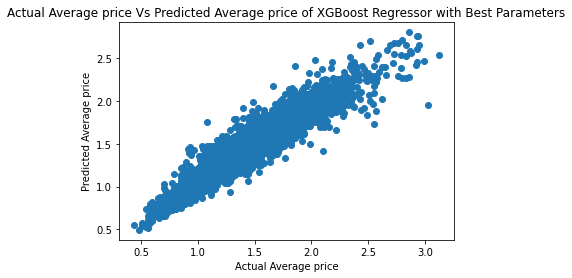

In [240]:
# Checking Actual sales Vs Predicted sales using Graph after Hyperparameter tuning:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Average price')
plt.ylabel('Predicted Average price')
plt.title('Actual Average price Vs Predicted Average price of XGBoost Regressor with Best Parameters')
plt.show()

##### Observation:
After hyperparameter tuning with best parameters of XGBoostRegressor is giving the best accuracy of 90.39%. So, we are going to save XGBoostRegressor Model for Avacado average price Prediction.

In [241]:
# model prediction using XGBRegressor
x_predict = list(xgbr.predict(x_test))
xgbr_sales = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(xgbr_sales))

       predicted_values  orignal_values
12597          0.903259            0.98
8150           1.114086            0.85
6127           0.824349            0.60
17449          1.634921            1.72
11629          1.527093            1.48
...                 ...             ...
6616           0.611880            0.58
5319           1.206918            1.05
5818           1.116074            1.11
1020           1.146375            1.26
16272          1.750364            2.03

[4563 rows x 2 columns]


In [243]:
#importing joblib
import joblib

joblib.dump(xgbr,'xgbr_avacado.obj')

# SAVING THE MODEL

['xgbr_avacado.obj']

In [244]:
xgbr_from_joblib=joblib.load('xgbr_avacado.obj')
xgbr_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([0.90325946, 1.1140856 , 0.8243494 , ..., 1.1160744 , 1.1463754 ,
       1.7503638 ], dtype=float32)

#### Conclusion:

In this Avacado Average Price prediction dataset on the basis of 12 independent variables we need to predict the Average price of Avacados. Regarding that we have done Univariate, Bivariate, multivariate analysis and got to know that in the year 2017 the demand of Avacados were high and for that the Average price is also high than in the year 2015,2016 and 2018. And we have also seen that Total US region is having the Avacados most. And after checking the VIF and Heatmap we got to know that there is presence of multicolinearity in the given features. For that we have to drop Total Volume Feature.
After cleaning the data we encode the nominal variables, and we have combine the date variable into a numerical feature as it is required in this dataset as our analysis.
After that we have created 7 different models out of which XGBRegressor has given the best accuracy of 87%. Hence, we have done hyperparameter tuning of XGB and By doing that we got the best accuracy of 90.34%. And for that we have saved
the xgbr model as it has given best accuracy.